# Machine Learning Analysis of Heart Disease Indicators

### Purpose of the project: 
To understand anayze various risk factors for heart disease (BMI, Alcoholism, Sex, etc.)


In [1]:
import numpy as np
import pandas as pd 
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
heart_disease= pd.read_csv("heart_2020_cleaned.csv")
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#one-hot enconding the categorical data into numerical
column_yes_no = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
heart_disease[column_yes_no] = heart_disease[column_yes_no].apply(lambda x: x.map({'Yes':1,'No':0}))
#Changing Male Sex to 1 and Female Sex to 0
column_1_0=["Sex"]
heart_disease[column_1_0] = heart_disease[column_1_0].apply(lambda x: x.map({'Male':1,'Female':0}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0.0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1.0,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0.0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0.0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0.0,0,Good,12.0,0,0,0


In [4]:
heart_disease['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [5]:
len(heart_disease['Race'].value_counts())

6

In [6]:
column_Race=["Race"]
heart_disease[column_Race] = heart_disease[column_Race].apply(lambda x: x.map({'White':0,'Hispanic':1,'Black':2, 'Other':3, 'American Indian/Alaskan Native':4}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,0.0,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,0.0,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,0.0,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,0.0,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,0.0,0.0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,1.0,1.0,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,1.0,0.0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,1.0,0.0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,1.0,0.0,0,Good,12.0,0,0,0


In [7]:
heart_disease['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [8]:
len(heart_disease['AgeCategory'].value_counts())

13

In [9]:
column_Age=["AgeCategory"]
heart_disease[column_Age] = heart_disease[column_Age].apply(lambda x: x.map({'18-24':0, '25-29':1,'30-34':2, '35-39':3, '40-44':4, '45-49':5,'50-54':6,'55-59':7, '60-64':8, '65-69':9,'75-79':10,'70-74':11,'80 or older':12}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1.0,1.0,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,1.0,0.0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,1.0,0.0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,1.0,0.0,0,Good,12.0,0,0,0


In [10]:
heart_disease['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [11]:
len(heart_disease['GenHealth'].value_counts())

5

In [12]:
column_health=["GenHealth"]
heart_disease[column_health] = heart_disease[column_health].apply(lambda x: x.map({'Excellent':0,'Very good':1,'Good':2, 'Fair':3, 'Poor':4}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1.0,1.0,0,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,1.0,0.0,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,1.0,0.0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,1.0,0.0,0,2,12.0,0,0,0


In [13]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              311727 non-null  float64
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [14]:
heart_disease.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                 True
Diabetic             True
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [15]:
heart_disease.dropna(how='any', inplace=True)

In [16]:
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1.0,1.0,0,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,1.0,0.0,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,1.0,0.0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,1.0,0.0,0,2,12.0,0,0,0


In [17]:
# Create data
X = heart_disease.drop('HeartDisease', axis=1)
y = heart_disease['HeartDisease']
target_names = ["Negative", "Positive"]


In [18]:
#prior to standardization you have to train test split
#Test size will be set to 0.25 if the training size is set to default. (25% test, 75% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(X_train)
#transform the data such that its distribution will have a mean value 0 and standard deviation of 1
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
#RandomForestClassifier  classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

    Negative       0.92      0.98      0.95     69049
    Positive       0.36      0.12      0.18      6657

    accuracy                           0.90     75706
   macro avg       0.64      0.55      0.56     75706
weighted avg       0.87      0.90      0.88     75706

Training Score: 0.9968166187471655
Testing Score: 0.9035083084563971


In [20]:
#We use our model to make a prediction about whether the heart disease risk factors predict a person having heart disease or not given what it has learnt.
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)


array([[67602,  1447],
       [ 5858,   799]], dtype=int64)

In [21]:
# Extremely Random Trees classifier classification report
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94     69049
    Positive       0.30      0.16      0.21      6657

    accuracy                           0.89     75706
   macro avg       0.61      0.56      0.58     75706
weighted avg       0.87      0.89      0.88     75706

Training Score: 0.996887067018321
Testing Score: 0.8936015639447336


In [22]:
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[66599,  2450],
       [ 5605,  1052]], dtype=int64)

## In this example, we’ll use AdaBoost to classify patients having heart disease (positve) or not having heart disease (negative)

In [24]:
 # AdaBoostClassifier classification report
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
#Next, we construct and fit our model to the scaled training set.
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94     69049
    Positive       0.30      0.16      0.21      6657

    accuracy                           0.89     75706
   macro avg       0.61      0.56      0.58     75706
weighted avg       0.87      0.89      0.88     75706

Training Score: 0.9151714754950092
Testing Score: 0.9128206482973609


## Random Forest &AdaBoost makes predictions by applying multiple decision trees to every sample and combining the predictions made by individual trees. However, rather than taking the average of the predictions made by each decision tree in the forest (or majority in the case of classification), in the AdaBoost algorithm, every decision tree contributes a varying amount to the final prediction.

In [25]:
# def model_tester(model, X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#     scaler = StandardScaler().fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
#     clf = model.fit(X_train_scaled, y_train)
#     print(classification_report(y_test, y_pred, target_names=target_names))
#     print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
#     print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
# #  n_estimators is used to specify the total number of trees in the forest.
# #Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. 
    
# model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X, y)
# model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X, y)
# model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X, y)
# model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X, y)
# model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X, y)
# model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X, y)

In [26]:
#RandomForestClassifier  classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    Negative       0.92      0.98      0.95     69049
    Positive       0.36      0.12      0.18      6657

    accuracy                           0.90     75706
   macro avg       0.64      0.55      0.56     75706
weighted avg       0.87      0.90      0.88     75706

Training Score: 0.9968166187471655
Testing Score: 0.9035083084563971


In [27]:
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[67602,  1447],
       [ 5858,   799]], dtype=int64)

In [28]:
import seaborn as sns

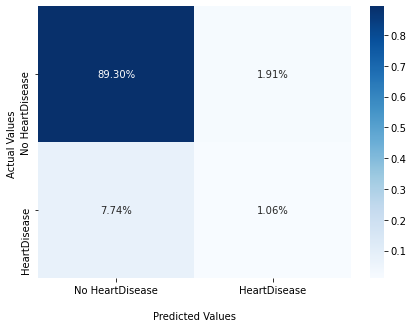

In [29]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

[0.35454013 0.01900985 0.00965033 0.02690224 0.07558761 0.06802548
 0.02413455 0.02100479 0.10380436 0.03301735 0.0201571  0.02418946
 0.06012349 0.107403   0.02048473 0.01494416 0.01702139]


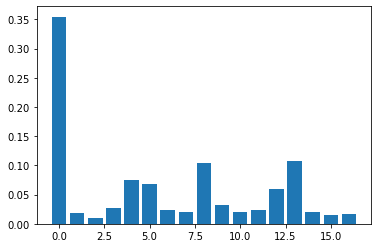

In [30]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [32]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False])

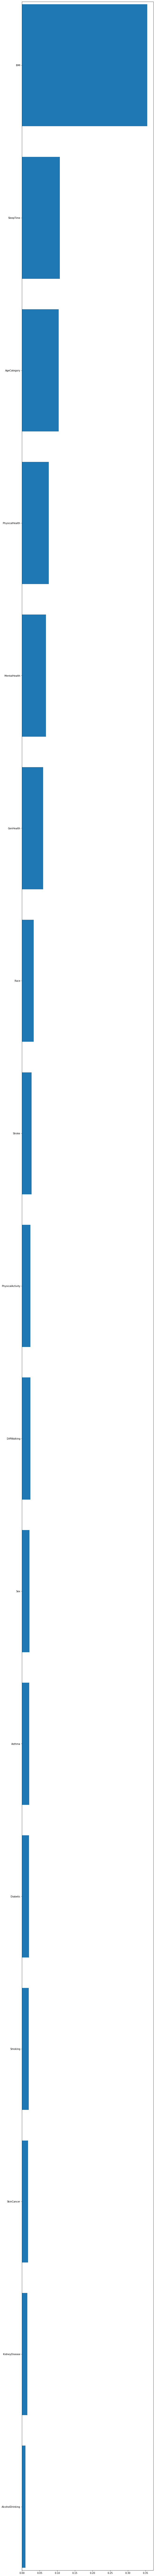

In [33]:
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [34]:
from sklearn.feature_selection import SelectFromModel

In [35]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [36]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9797593310936654
Testing Score: 0.8903653607375902


In [ ]:
# heart_disease.to_csv('heart_disease_encoded.csv', index=False)